In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.geometry.multipolygon import MultiPolygon

In [172]:
%matplotlib inline

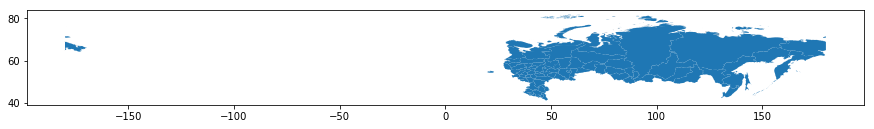

In [173]:
russia_map = gpd.read_file('/Users/evgeniyamiller/Dropbox/draw_picture/RUS_adm/RUS_adm1.shp')
fig,ax = plt.subplots(figsize = (15,15))
russia_map.plot(ax = ax)

In [174]:
russia_map.geometry.apply(type).unique()

mp = MultiPolygon([russia_map.geometry[0], russia_map.geometry[1]])
#print(mp, type(mp))

In [175]:
def rectify_poly(p):
    pts = p.exterior.coords[:]
    def angle_corr(angle):
        return angle + 360 if angle < 0 else angle
    pts2 = [(angle_corr(pp[0]), angle_corr(pp[1])) for pp in pts]    
    return Polygon(pts2)

def rectify_multipoly(mp):
    if type(mp) == Polygon:
        return rectify_poly(mp)
    elif type(mp) == MultiPolygon:
        return MultiPolygon([rectify_poly(p) for p in mp])
    

new_geom = russia_map.geometry.apply(rectify_multipoly)

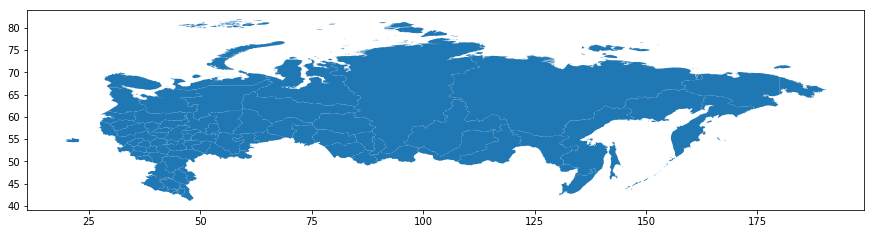

In [176]:
russia_map2 = russia_map.copy()
russia_map2.geometry = new_geom
crimea_map = gpd.read_file('/Users/evgeniyamiller/Dropbox/draw_picture/crimea_9sr/crimea_9sr.shp')
fig,ax = plt.subplots(figsize = (15,15))
ax.clear()

russia_map2.plot(ax = ax)

In [177]:
russia_with_crimea = russia_map2.append({'geometry': crimea_map.geometry[0],
                    'NAME_0': 'Russia', 'ISO': 'RUS',
                    'NAME_1': 'Crimea', 'TYPE_1': 'Respublika',
                    'ENGTYPE_1': 'Republic', 'NL_NAME_1':'Республика Крым',
                    'VARNAME_1': 'Crimea', 'ID_0':188, 'ID_1':91}, ignore_index=True)

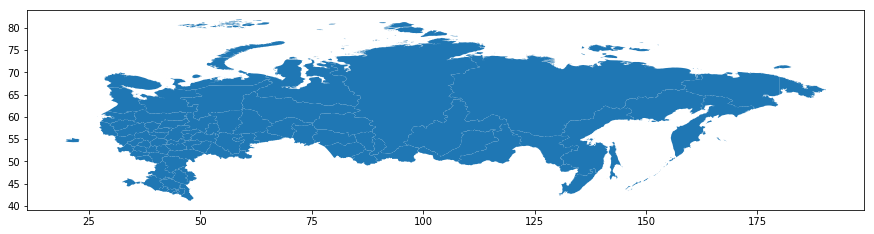

In [178]:
fig,ax = plt.subplots(figsize = (15,15))
russia_with_crimea.plot(ax = ax)

In [179]:
#russia_with_crimea

/Users/evgeniyamiller/anaconda/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


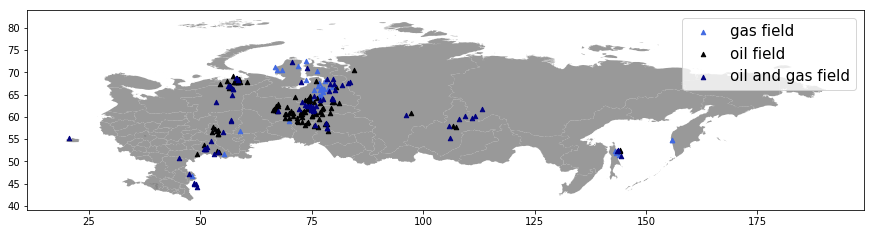

In [180]:
#Рисуем месторождения газа и нефти на карте РФ
df = pd.read_excel('/Users/evgeniyamiller/Dropbox/draw_picture/oil_gas_fields.xlsx')
#df.head()

geometry = [Point(xy) for xy in zip(df["Долгота"], df["Широта"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
#geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
russia_with_crimea.plot(ax = ax, alpha=0.8, color="grey")
geo_df[geo_df['Тип месторождения'] == "газовое"].plot(ax = ax, markersize = 20, color = "royalblue", marker = "^", label = "gas field")
geo_df[geo_df['Тип месторождения'] ==  "нефтяное"].plot(ax = ax, markersize = 20, color = "black", marker = "^", label = "oil field")
geo_df[geo_df['Тип месторождения'] ==  "нефтегазовое"].plot(ax = ax, markersize = 20, color = "navy", marker = "^", label = "oil and gas field")
geo_df[geo_df['Тип месторождения'] == ""].plot(ax = ax, markersize = 20, color = "maroon", marker = "o", label = "Nan")
plt.legend(prop={'size': 15})
plt.savefig('/Users/evgeniyamiller/Dropbox/draw_picture/map_oil_and_gas_fields.png', transparent=True, bbox_inches='tight')

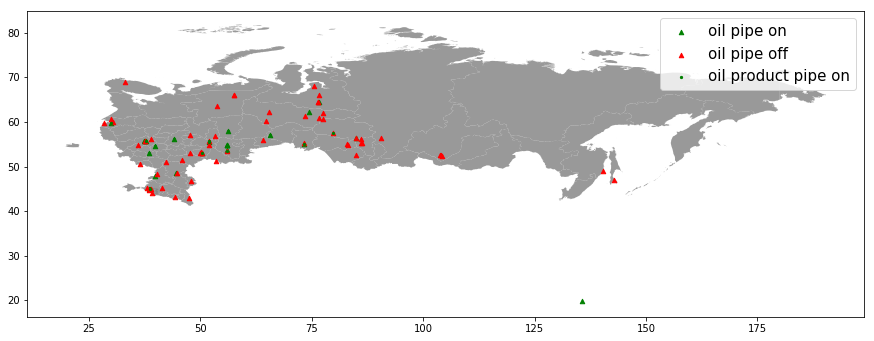

In [202]:
#Рисуем НПЗ
df = pd.read_excel('/Users/evgeniyamiller/Dropbox/draw_picture/plantss.xlsx')

geometry = [Point(xy) for xy in zip(df["Долгота"], df["Широта"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
#geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
russia_with_crimea.plot(ax = ax, alpha=0.8, color="grey")
geo_df[geo_df['Подключен к нефтепроводу'] == "Да"].plot(ax = ax, markersize = 20, color = "green", marker = "^", label = "oil pipe on")
geo_df[geo_df['Подключен к нефтепроводу'] == "Нет"].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "oil pipe off")
geo_df[geo_df['Подключен к нефтепродуктопроводу'] ==  "Да"].plot(ax = ax, markersize = 20, color = "green", marker = ".", label = "oil product pipe on")
plt.legend(prop={'size': 15})
plt.savefig('/Users/evgeniyamiller/Dropbox/draw_picture/peocessing_plants.png', transparent=True, bbox_inches='tight')

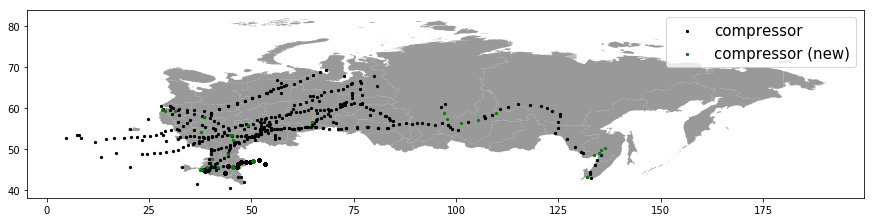

In [211]:
#Рисуем компрессоры, восстанавливаем трубопроводы
df = pd.read_excel('/Users/evgeniyamiller/Dropbox/draw_picture/compressor.xlsx')

geometry = [Point(xy) for xy in zip(df["Долгота"], df["Широта"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
#geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
russia_with_crimea.plot(ax = ax, alpha=0.8, color="grey")
geo_df[geo_df['Состояние'] == "в эксплуатации"].plot(ax = ax, markersize = 20, color = "black", marker = ".", label = "compressor")
geo_df[geo_df['Состояние'] == "строится"].plot(ax = ax, markersize = 20, color = "green", marker = ".", label = "compressor (new)")
plt.legend(prop={'size': 15})
plt.savefig('/Users/evgeniyamiller/Dropbox/draw_picture/compressor.png', transparent=True, bbox_inches='tight')

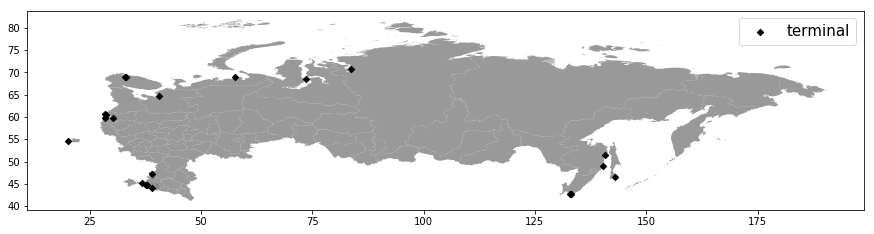

In [209]:
#Рисуем терминалы
df = pd.read_excel('/Users/evgeniyamiller/Dropbox/draw_picture/terminal.xlsx')

geometry = [Point(xy) for xy in zip(df["Долгота"], df["Широта"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
#geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
russia_with_crimea.plot(ax = ax, alpha=0.8, color="grey")
geo_df.plot(ax = ax, markersize = 20, color = "black", marker = "D", label = "terminal")
plt.legend(prop={'size': 15})
plt.savefig('/Users/evgeniyamiller/Dropbox/draw_picture/terminal.png', transparent=True, bbox_inches='tight')